In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../Reports/50_startups.csv")

In [6]:
df.shape

(50, 4)

In [7]:
x = df.drop(columns=["Profit"])
y = df["Profit"]

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [10]:
# Check the shapes of the training and test sets
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (35, 3)
x_test shape: (15, 3)
y_train shape: (35,)
y_test shape: (15,)


Our main goal is to predict the value of k and train the model accordingly.


In [11]:
k_values = range(1, 11)
train_errors = []
validation_errors = []
metrics = []

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [13]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [14]:
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)

    knn.fit(x_train, y_train)
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test)

    mae = mean_absolute_error(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)

    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

    r2 = r2_score(y_test, y_pred_test)
    n = x_test.shape[0]
    p = x_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

    metrics.append([k, mae, mse, rmse_test, r2, adjusted_r2])

    train_errors.append(rmse_train)
    validation_errors.append(rmse_test)

In [15]:
df_metrics = pd.DataFrame(
    metrics, columns=["k", "MAE", "MSE", "RMSE", "R²", "Adjusted R²"]
)
print(df_metrics)

    k           MAE           MSE          RMSE        R²  Adjusted R²
0   1   6154.218667  5.558132e+07   7455.287767  0.942418     0.926713
1   2   7296.866667  8.130397e+07   9016.871233  0.915769     0.892797
2   3   5804.870667  5.682196e+07   7538.034304  0.941132     0.925077
3   4   8281.769000  9.830594e+07   9914.935159  0.898155     0.870379
4   5   9608.566933  1.371419e+08  11710.758706  0.857920     0.819172
5   6  11079.705333  1.684029e+08  12977.013803  0.825534     0.777952
6   7  11668.129238  2.037323e+08  14273.483171  0.788933     0.731369
7   8  12750.635667  2.363915e+08  15375.028130  0.755097     0.688306
8   9  14402.588444  2.994441e+08  17304.453086  0.689775     0.605168
9  10  16057.647333  3.539592e+08  18813.803831  0.633297     0.533287


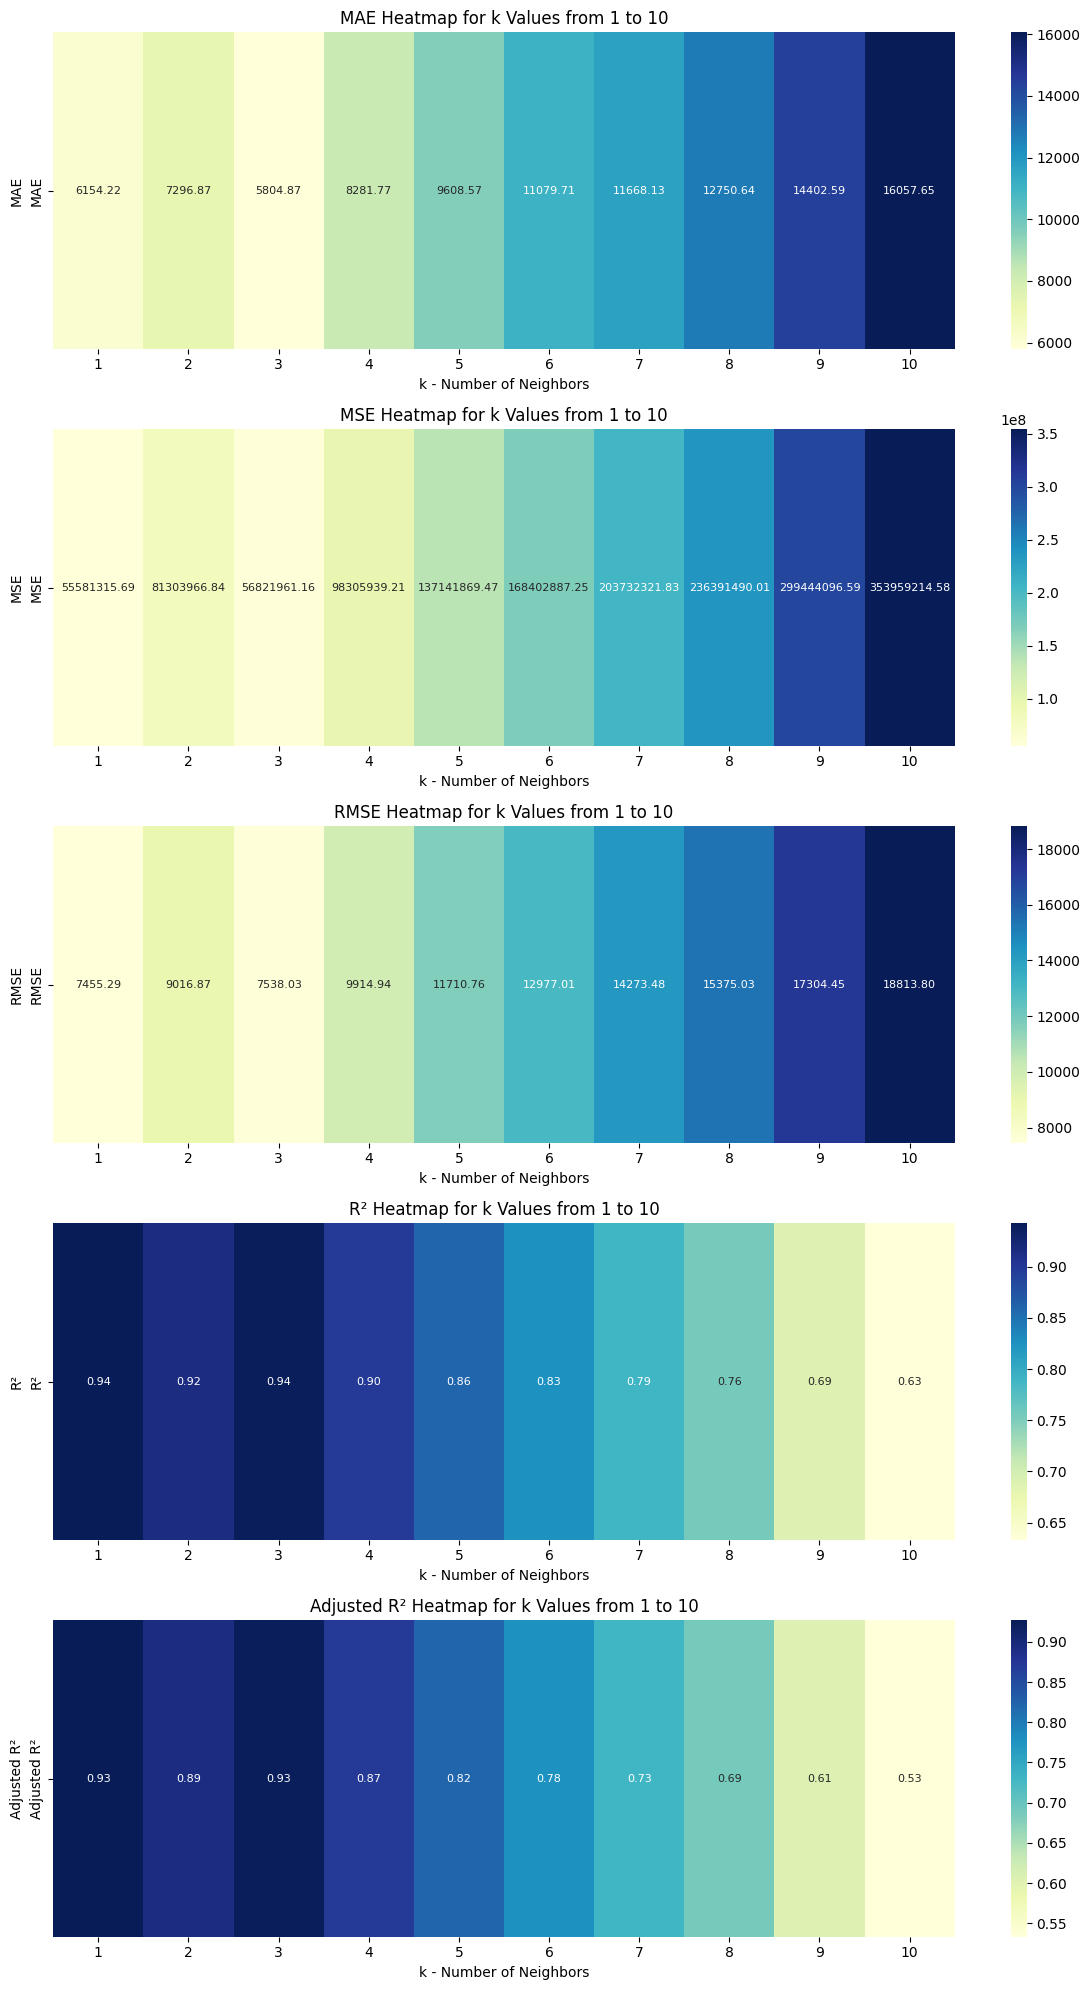

In [16]:
# List of metrics to plot
metrics_list = ["MAE", "MSE", "RMSE", "R²", "Adjusted R²"]

# Set up the figure for multiple subplots
fig, axes = plt.subplots(nrows=len(metrics_list), ncols=1, figsize=(12, 20))

# Loop over each metric and generate a heatmap in a subplot
for i, metric in enumerate(metrics_list):
    sns.heatmap(
        df_metrics.pivot_table(index="k", values=metric).T,
        annot=True,
        cmap="YlGnBu",
        fmt=".2f",
        annot_kws={"size": 8},
        ax=axes[i],
    )
    axes[i].set_title(f"{metric} Heatmap for k Values from 1 to 10")
    axes[i].set_xlabel("k - Number of Neighbors")
    axes[i].set_ylabel(metric)

plt.tight_layout()
plt.show()

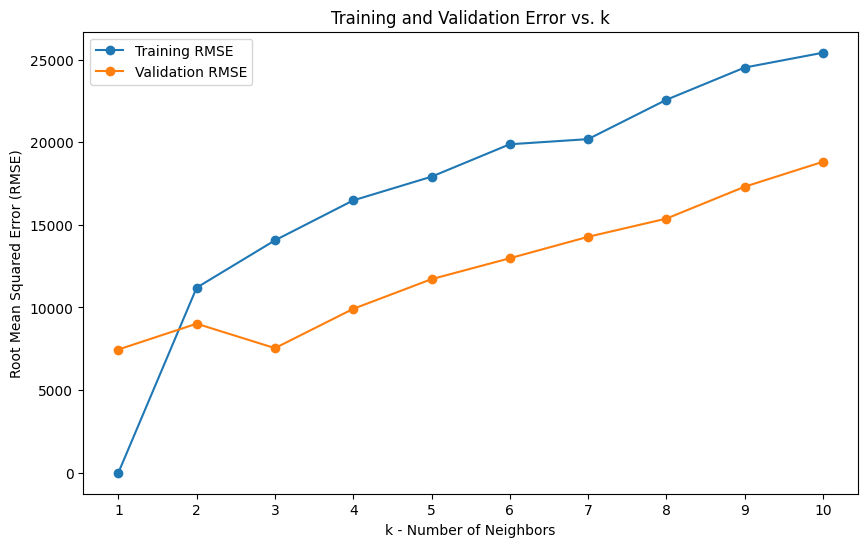

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label="Training RMSE", marker="o")
plt.plot(k_values, validation_errors, label="Validation RMSE", marker="o")
plt.xlabel("k - Number of Neighbors")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Training and Validation Error vs. k")
plt.legend()
plt.xticks(ticks=k_values)
plt.show()

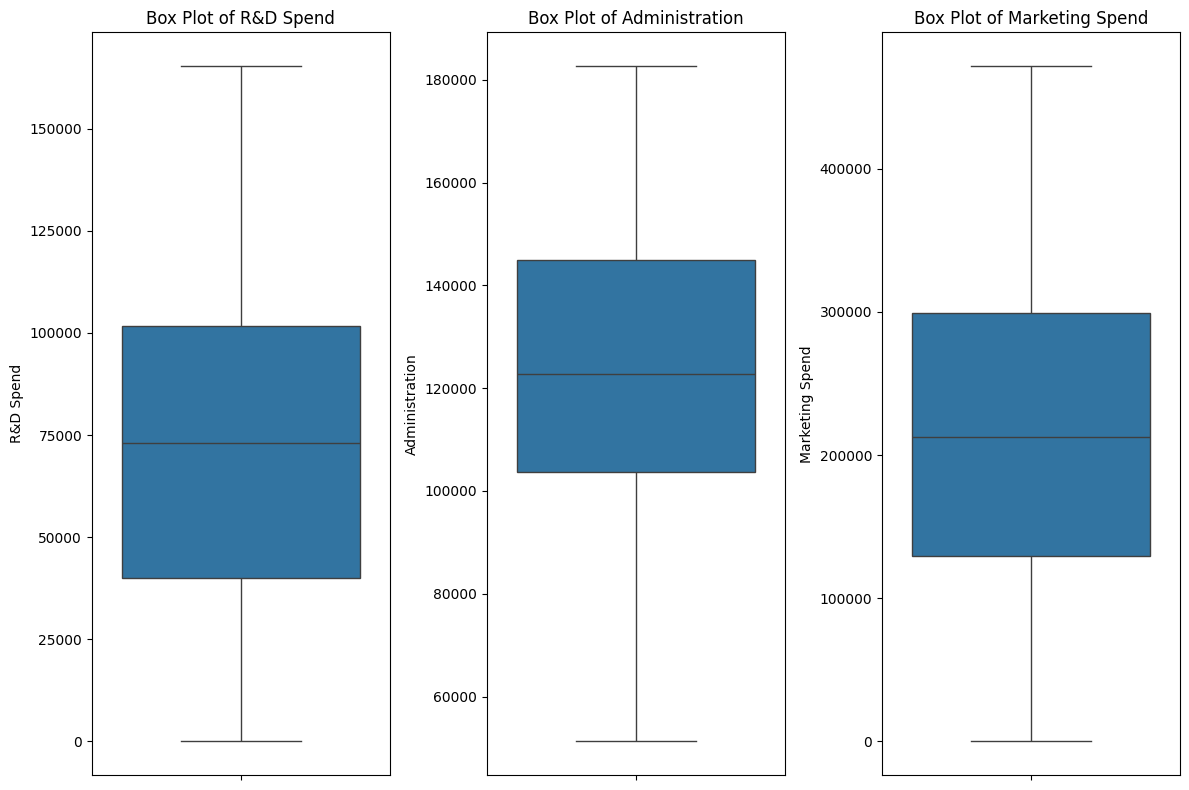

In [20]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(x.columns):
    plt.subplot(1, len(x.columns), i + 1)
    sns.boxplot(x[col])
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()